# Recipes for Explodatory Data Analysis by means of simple plots

- toc: true 
- badges: true
- comments: false
- categories: [r,ggplot,recipes]


*TOC* 
* how to simulate simple data sets
* setup a template for plots 
* create a line plot
* add a jiiter plot to the base plot
* increase the dataset dimension for creating a scatter plot


In [15]:

#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°
#  loading required libraries for this notebook
#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°

#loading libraries

library(ggplot2)
library(gridExtra)
library(data.table)
library(RColorBrewer)
library(ggrepel)
library(patchwork)



# Which plot to choose?
The answer depend on your data. Depending on the kind of relation you would like to highlight there are different plots that can be useful. In my workflow generally the first think I need to check is

1. presence of a changing in time of one (or multiple) variables
2. check if the data follow a distribution
3. check the presence of a linear correlation between the variables 

For this purpose we can use

1. time series plots
2. distribution plots
3. correlation plots

First of all we generate some data

In [16]:


#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°
#	creating a very simple dataframe
#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°

# Parameters

x_min   <- 0
x_max   <- 10   
x_step  <- 0.01

y_mean  <- 0.5
y_sd    <- 0.25
y_min   <- -1
y_max   <- 1     

x       <- seq(x_min,x_max,x_step)

# Variables
var_random  <- runif(x,y_min,y_max)
var_norm    <- rnorm(x,y_mean,y_sd) 
var_sin     <- sin(x)

# Data.frame 

df  <- data.frame (x,var_random,var_norm,var_sin)
dt  <- data.table(df)
# Melt 
dtm <- melt(dt, id.vars="x")
head(dtm)
#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°


x,variable,value
<dbl>,<fct>,<dbl>
0.00,var_random,-0.6195115
0.01,var_random,-0.5214437
0.02,var_random,0.6802102
0.03,var_random,-0.4831424
0.04,var_random,0.3337858
0.05,var_random,-0.8708421


*notes about the code* A few comments on the code. First of all we setup the min of x and y and also a few parameters that will e used to generate the data. as a second step we use the functions `runif`,`rnorm` and `sin` to create a *random variable*, a *uniformly distributed variable* and a *sinusoid*. We use the function `data.frame` to put togheter the *x* and *vars*, we then transform everything in a `data.table` since we need to use the function `melt` from the data.table library. In this case the *id* of each variable corrensponds to the x and so in the `melt` function we used as a parameter the `id.vars=x`

Now that we have our data we start plotting them. At first we will setup the general aspect of the plot. We will setup the general aspect of the plot and than add our points. The idea is to create a reusable "template" for all our exploratory data. I love both the basic R plot and ggplot. For this examples we will use `ggplot` and modify a theme

In [17]:

theme_pub <- function(){ 
        
    theme_minimal() %+replace%    #replace elements we want to change
    
    theme(
      
            #text elements
      plot.title = element_text(             #title
                   size = 24,                #set font size
                   face = 'bold',            #bold typeface
                   hjust = 0,                #left align
                   vjust = 2),               #raise slightly
      
      plot.subtitle = element_text(          #subtitle
                   size = 24),               #font size
      
      plot.caption = element_text(           #caption
                   size = 24,                 #font size
                   hjust = 1),               #right align
      
      axis.title = element_text(             #axis titles
                   size = 24),               #font size
      
      axis.text = element_text(              #axis text
                  size = 24),                #font size
   
      legend.position = "none"
     )
}


The previous code create a personalised theme replacing the settings that can be found in the `theme_minimal` from ggplot. For doing that we use the command  `%+replace%`. We just changed some text options  plot, but here you can insert all the customization you want (see the ggplot reference [here](https://ggplot2.tidyverse.org/reference/).
Now that we have set the theme for our plot we will plot the three variables. Since we only have 3 variables we can create a line plot for each of the variable and using the library `patchwork` we put all of the plots together

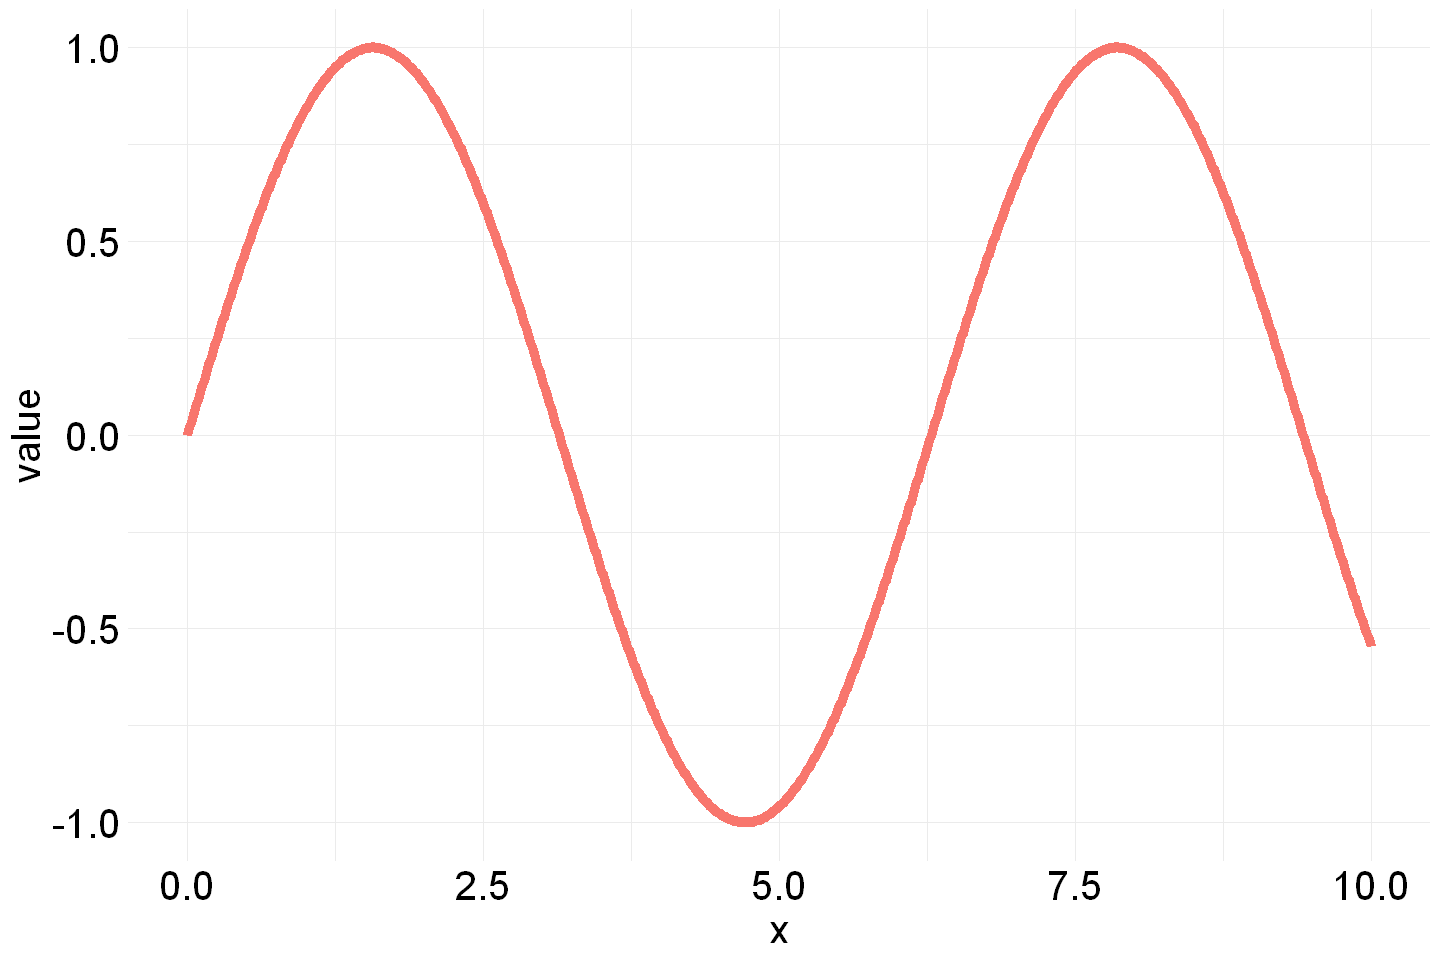

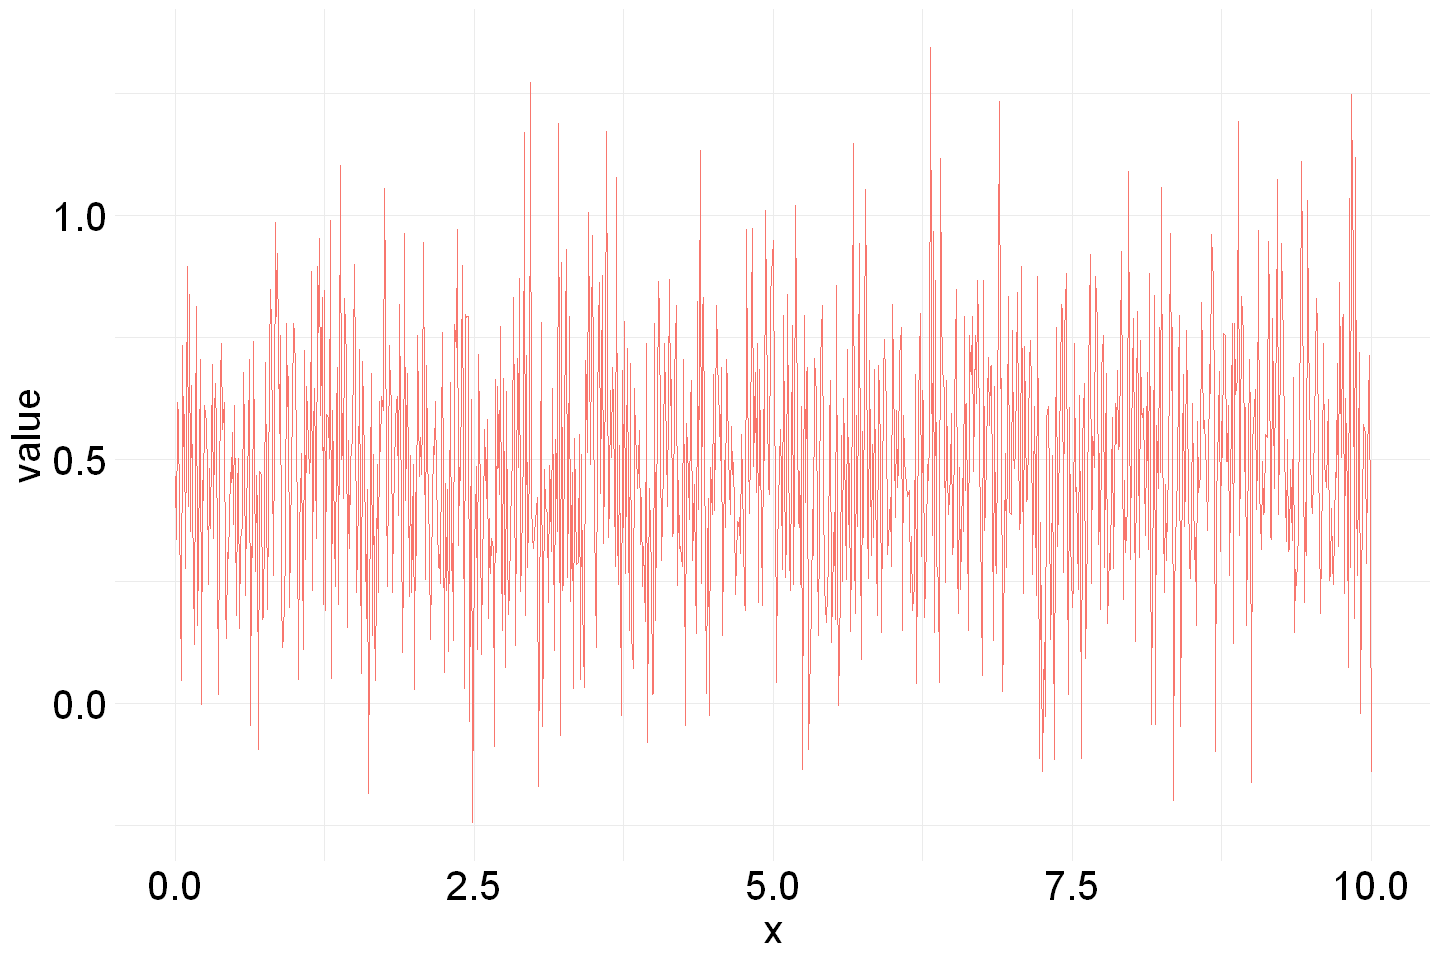

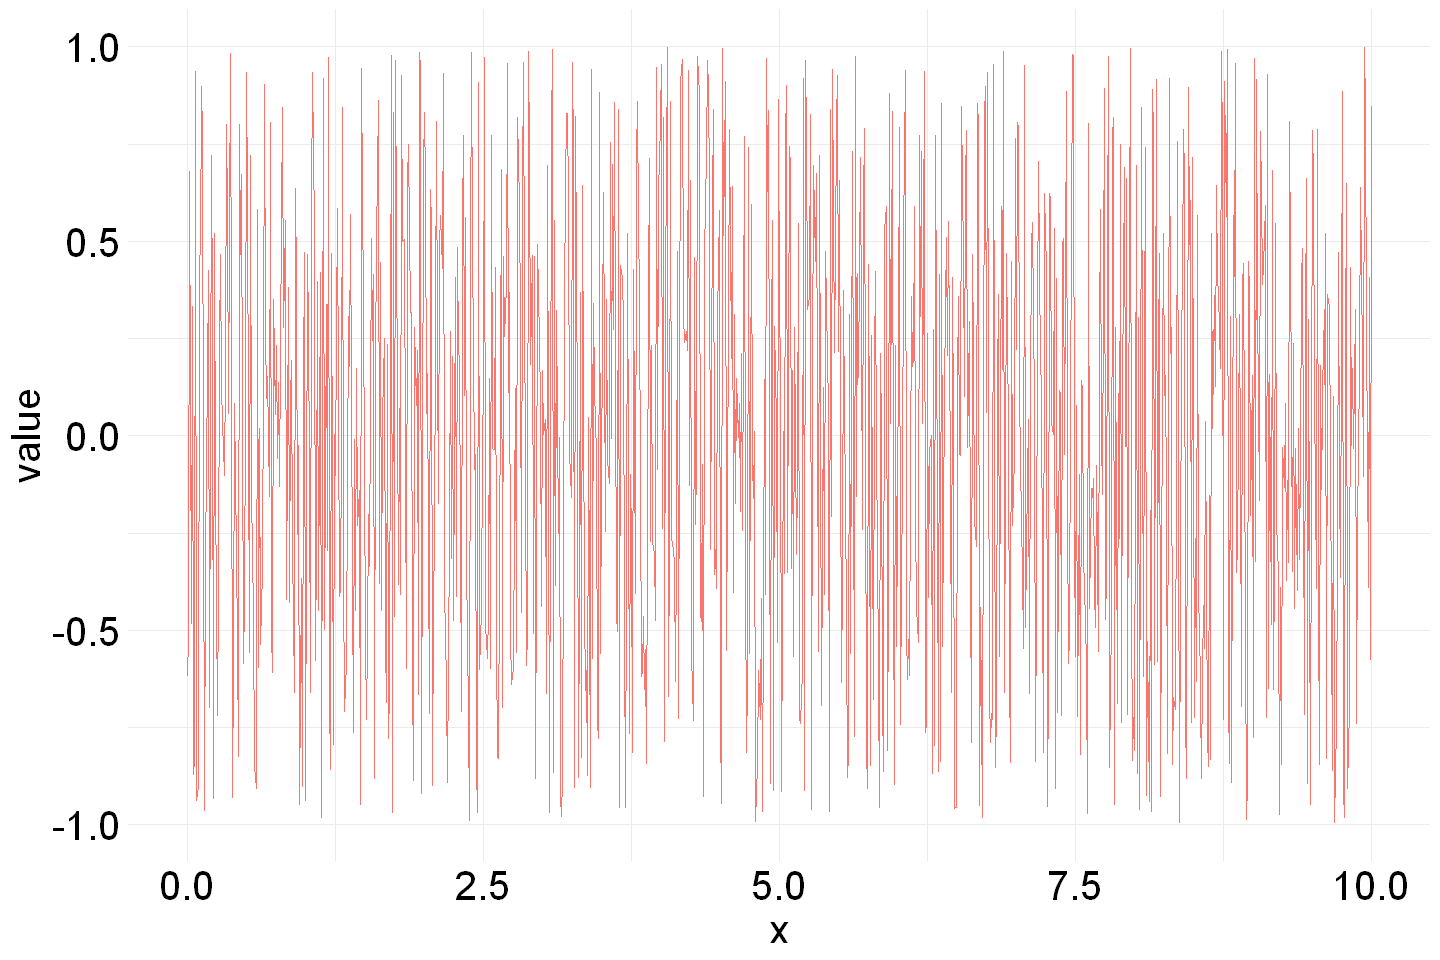

In [18]:

#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°
#	Line plot
#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°

options(repr.plot.width=12, repr.plot.height=8)

p <- ggplot(dtm[variable=="var_sin"], aes(x = x, y = value, group=variable)) +
     geom_line(aes(linetype=variable,color=variable),size=3) + theme_pub()
     

p1 <- ggplot(dtm[variable=="var_norm"], aes(x = x, y = value, group=variable)) +
     geom_line(aes(linetype=variable,color=variable)) + theme_pub()          
     

p2 <- ggplot(dtm[variable=="var_random"], aes(x = x, y = value, group=variable)) +
     geom_line(aes(linetype=variable,color=variable)) + theme_pub()

p
p1
p2
        


So what does the previous lines of code works. First of all we create an object `p`. For ggplot every plot is just an object that we can recall later. This is very important since we can put plots in a `list`, we can write *functions* that can generate plots and in a few lines and we can take advantage of how `R` deals with objects also (I'm using the term *object* with large acception here and not in a stricly language meaaning). We invock a `ggplot` and we tell that he should consider the data `dtm` as source for the plot. Since we do not want to plot all the variables we select only the `variable_sin`. Then we need to specify the `x` and `y` and also if we want any grouping variable. Everything included in the parenthesis after the `aes()` takes care of it. Now the important part: adding a line plot we use the `geom_line` (if you stop here and try to get a plot you will only get an empty canvas + the x and y axis and labels). This will create the line plot and finally we use the theme for the plot we just created. 
What does our plots tell us?
We can spot without problem the sinusoid. While the other data looks noisy and random. Is there any kind of distribution in the values of our variables? Let's find it our creating histograms of the values of the variables in exam.

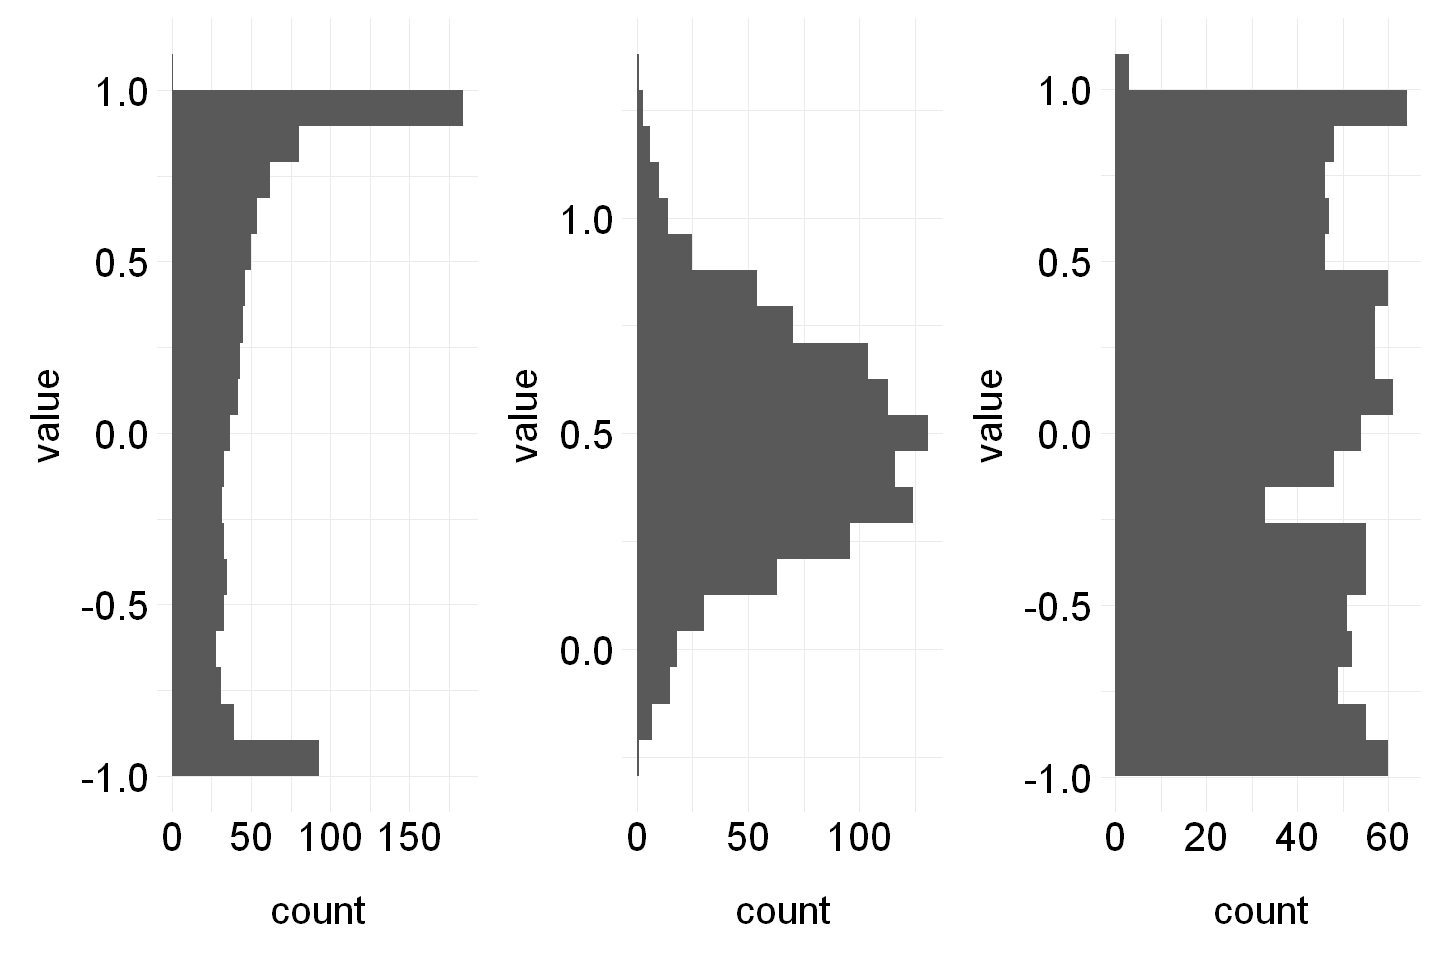

In [19]:

#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°
# Histogram plot
#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°

p3 <- ggplot(dtm[variable=="var_sin"], aes(y = value, group=variable)) +
     geom_histogram(bins=20) + theme_pub()          
     
p4 <- ggplot(dtm[variable=="var_norm"], aes(y = value, group=variable)) +
     geom_histogram(bins=20) + theme_pub()          

p5 <- ggplot(dtm[variable=="var_random"], aes(y = value, group=variable)) +
      geom_histogram(bins=20) + theme_pub()

p3 + p4 + p5

*notes on the code*. Since `dtm` is a `data.table` we can use the following synthax `dtm[variable=="var_sin"]` to  select only the variable we would like to plot. We add an histogram and with the options `bins=20`,`R` will take care of splitting the distributions in 20 bins. 
*What do the plots tell us?*
It is easy to spot at a glance that we have one of the variable with a normal distribution while the other are not. The sin(x) looks as expected with higher frequencies of values at -1 and 1 and the noise variable has does not show any kind of distribution.

Now we will use another kind of plot to see how the data are distributed. What is called a jiiter plot


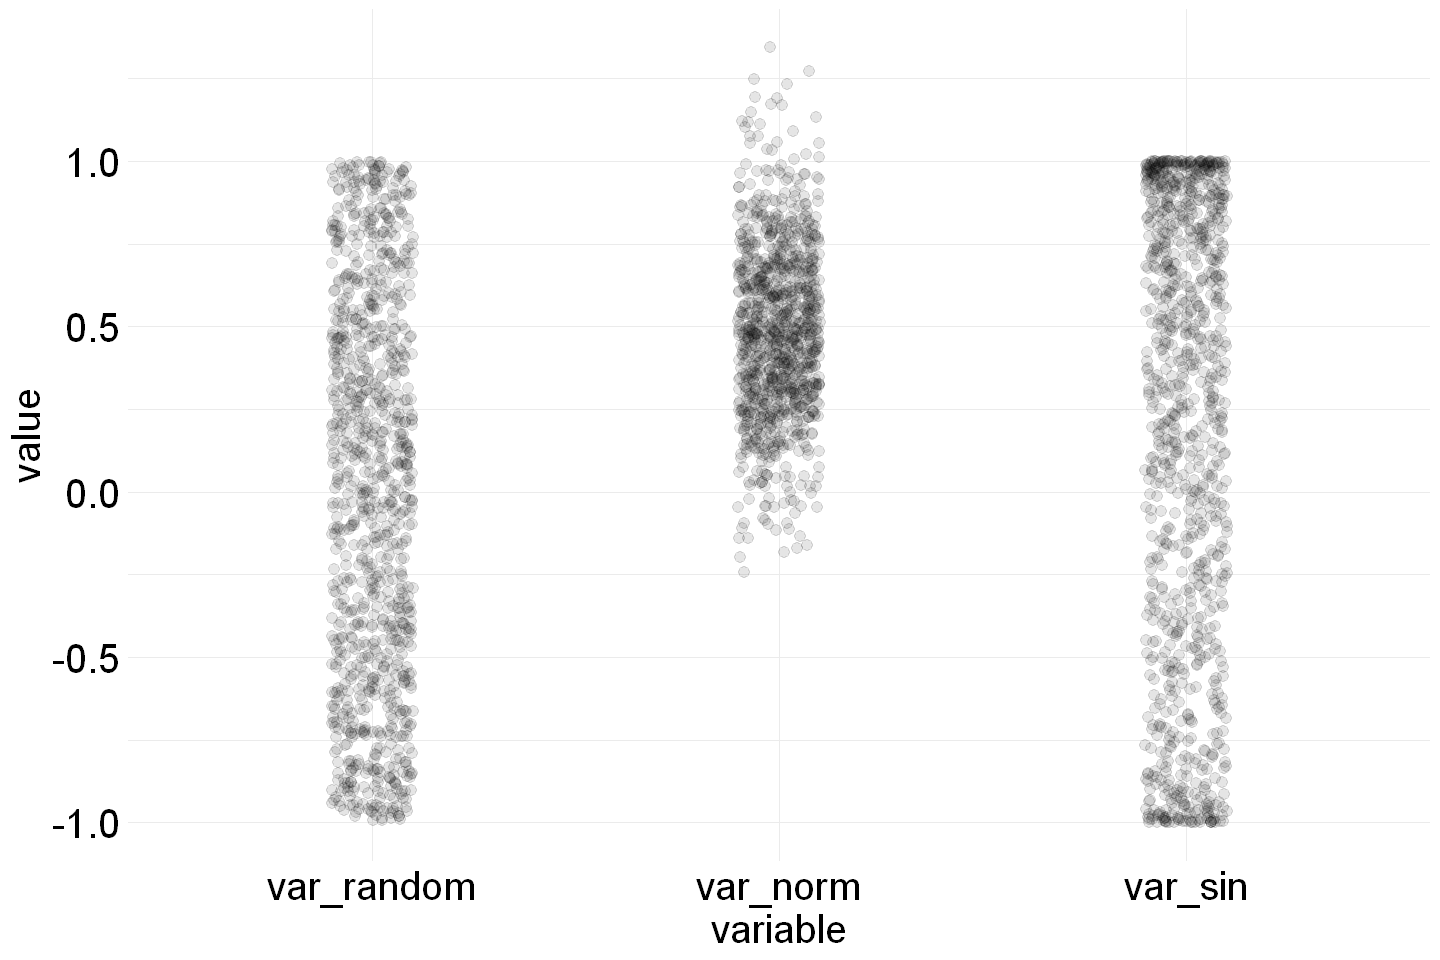

In [20]:
pj1 <- ggplot(dtm, aes(x=variable,y = value, group=variable))            +
       geom_jitter(position = position_jitter(0.1),alpha=0.1,, size = 3) +
       theme_pub()
pj1



*notes on the code:* in this case we just used all the  dataframe with the variable as x and the y as the value. since we have lots of points we used an alpha value of 0.1 in order to have a nice effect on the plot.
About the results. the concentration of points (absent in the first case, concentrated on a mean value, at the border for the sinusoidal values) gives us a perfect glance of the distribution of the values.
Finally in order to explore 
Let's add a second se of "measurements" for each variable to the dataset previously created and let's plot them 


In [21]:
#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°
# new variables
#+++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°+++++++++°

var_random2  <- runif(x,y_min,y_max)
var_norm2    <- rnorm(x,y_mean,y_sd) 
var_sin2     <- sin(x) + rnorm(x,0,0.1) 

At first we will plot them and add them to the previous plot

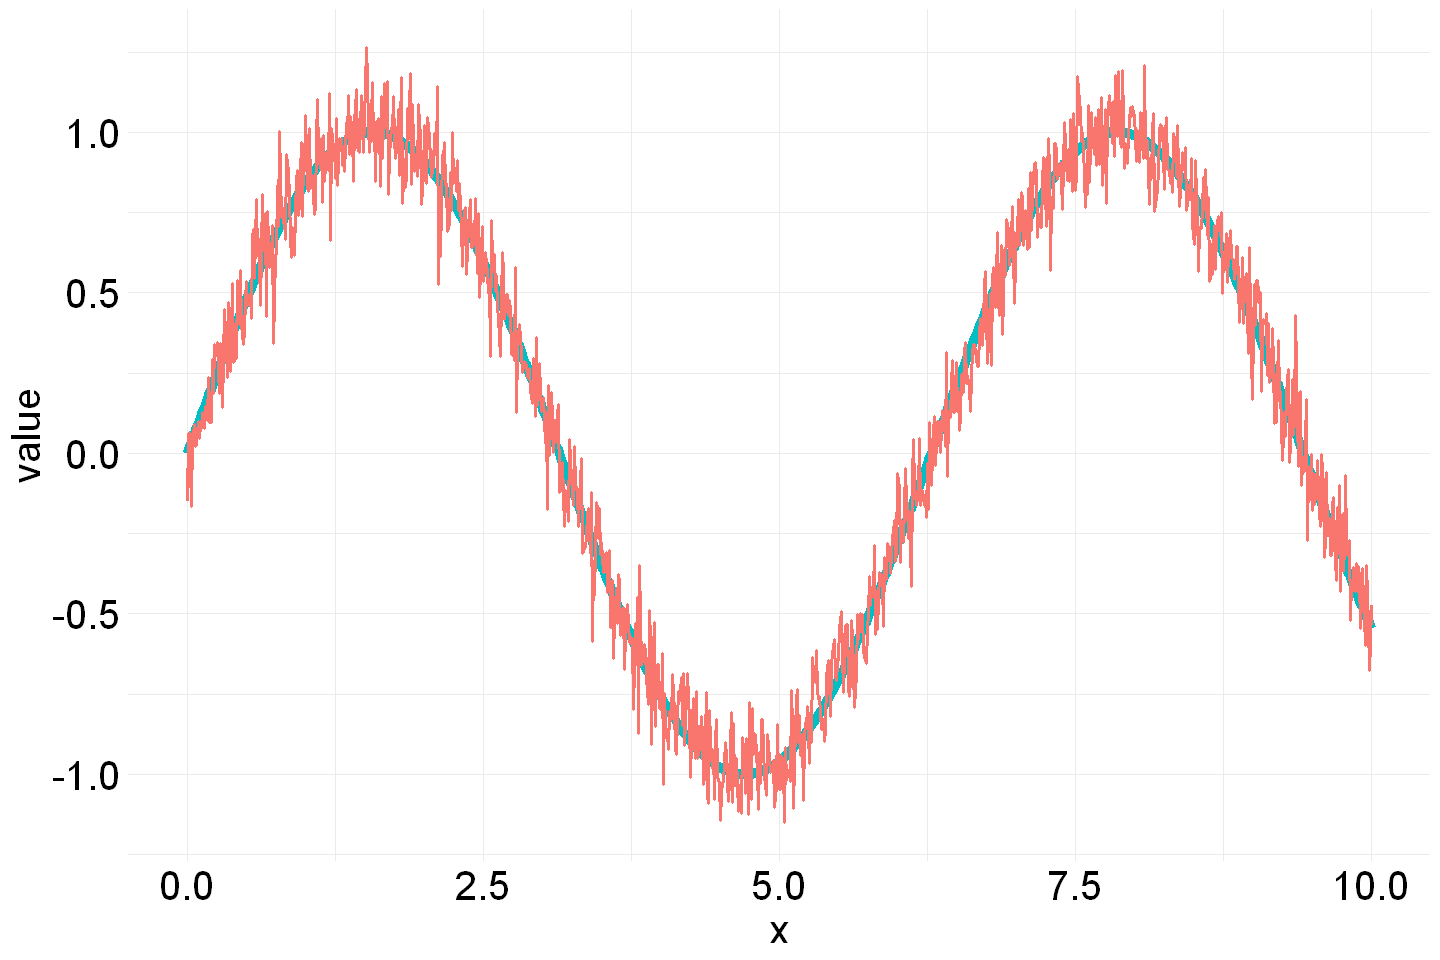

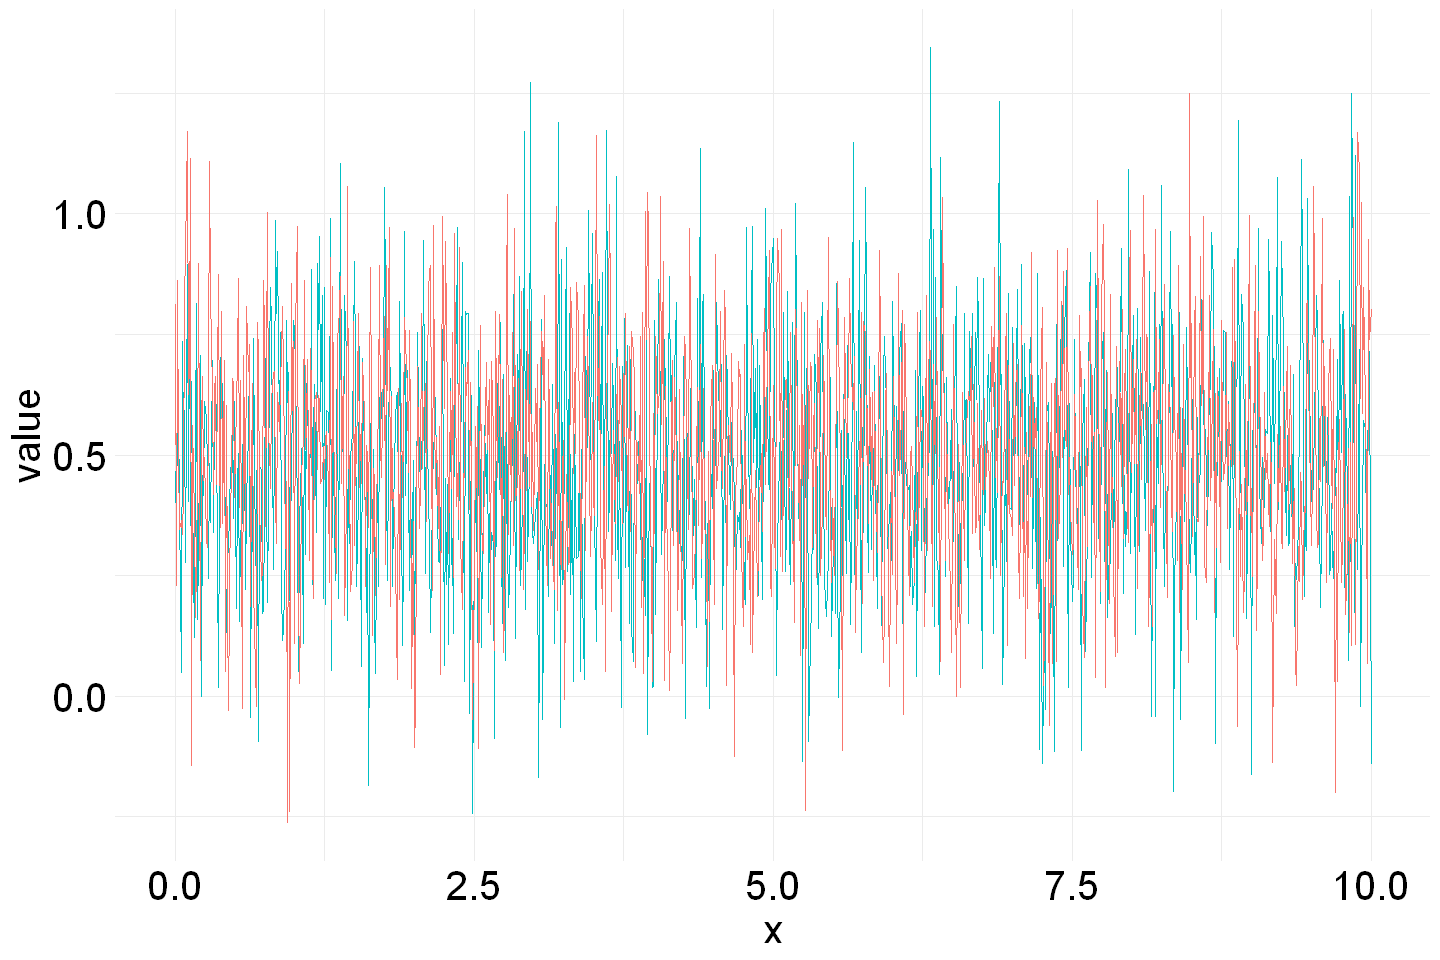

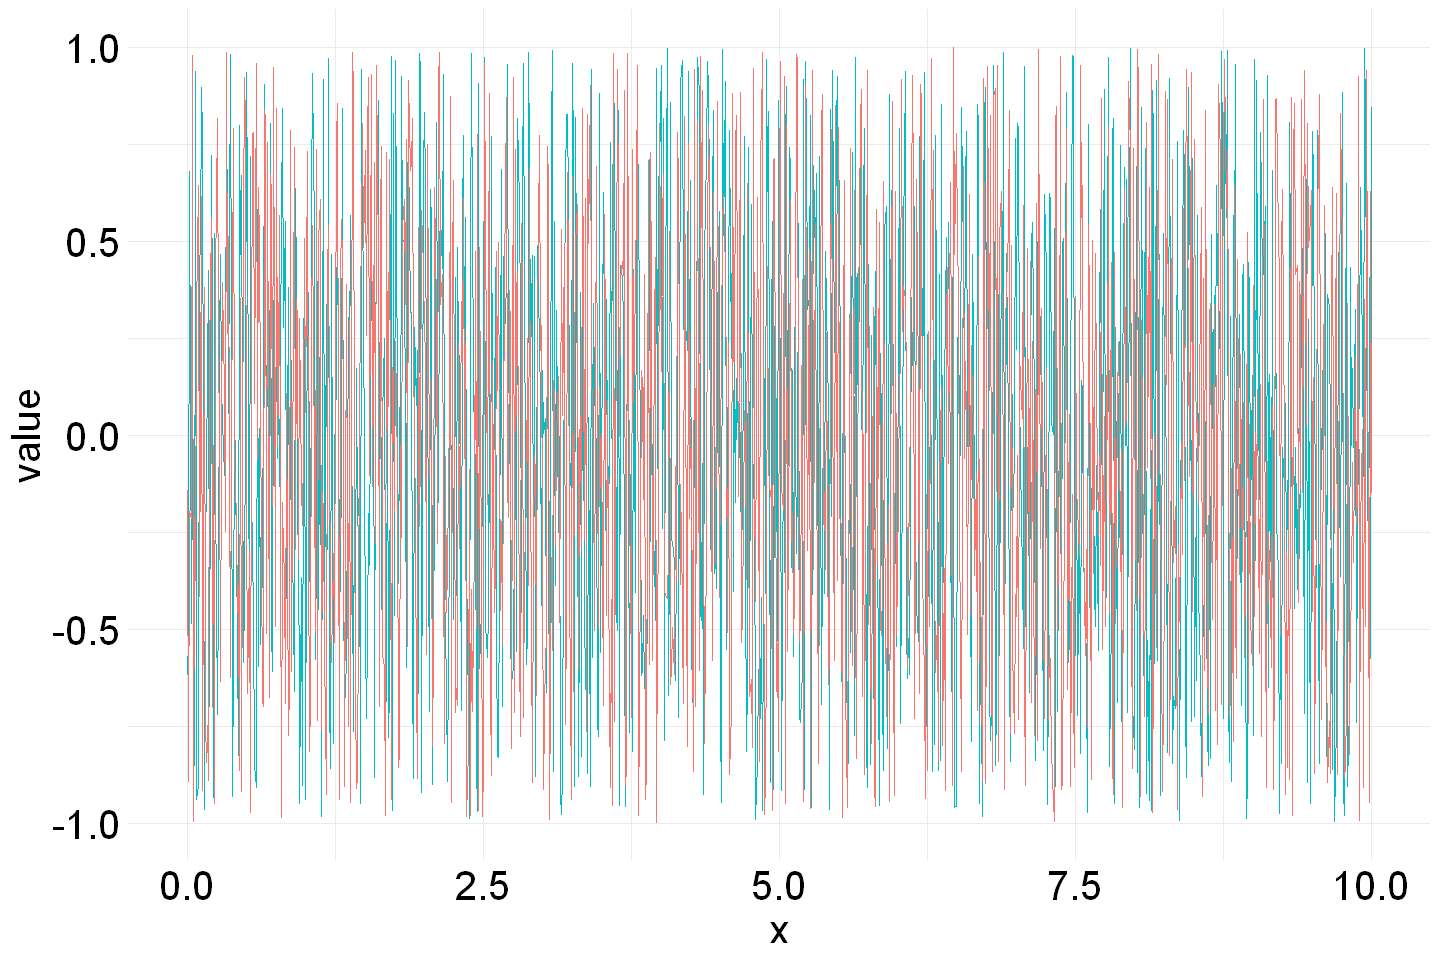

In [22]:
p7 <- p  + geom_line(aes(y=var_sin2, color="blue"),size=1) 
p8 <- p1 + geom_line(aes(y=var_norm2, color="blue")) 
p9 <- p2 + geom_line(aes(y=var_random2, color="blue")) 

p7 
p8 
p9

we could have changed the dataframe and add the new columns but the versatility of `ggplot` let us add a new layer of plot and also specify the new color we would like to use for it. Are these "second measurements"s correlated in comparison with the previous one?  
We can check it using a *scatter plot*. ggplot can help us with the command geom points but this time for sake of clarity we will first merge the new data with the dataframe

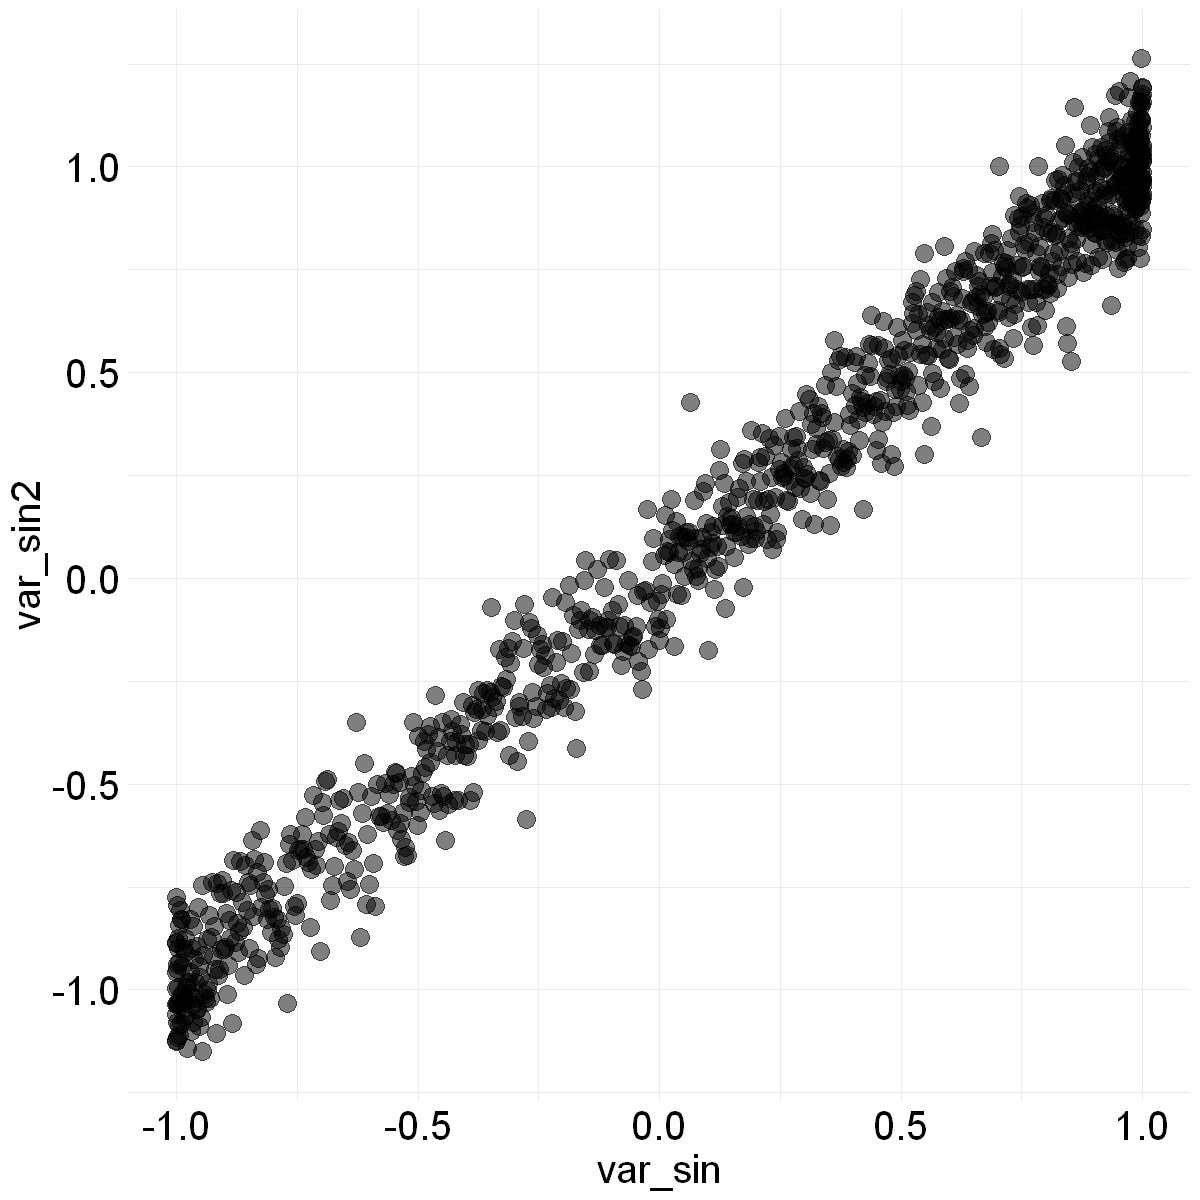

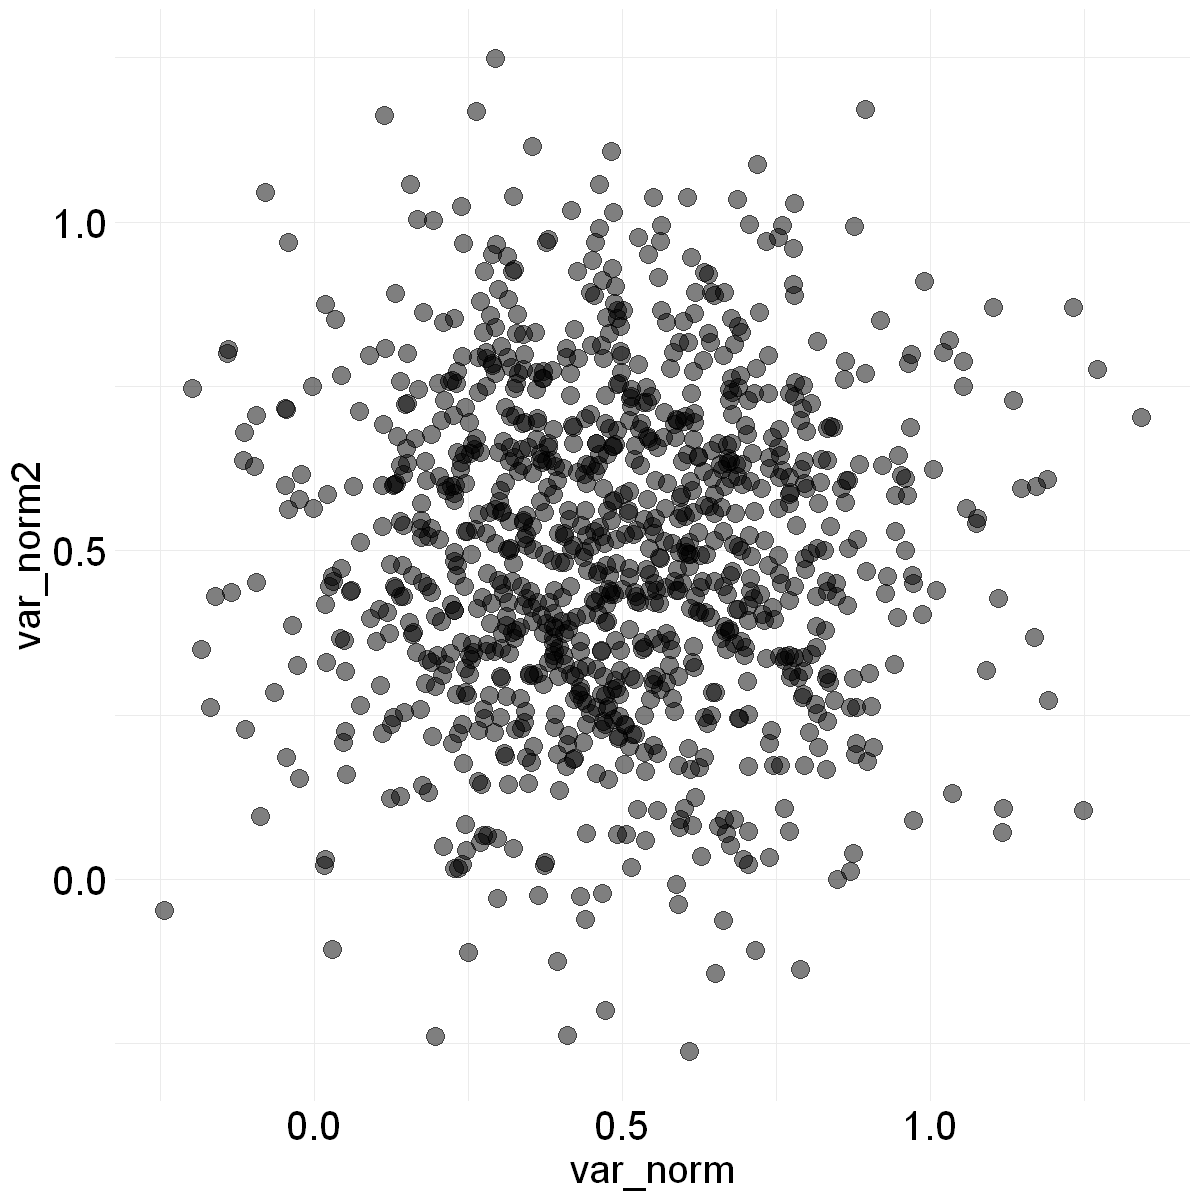

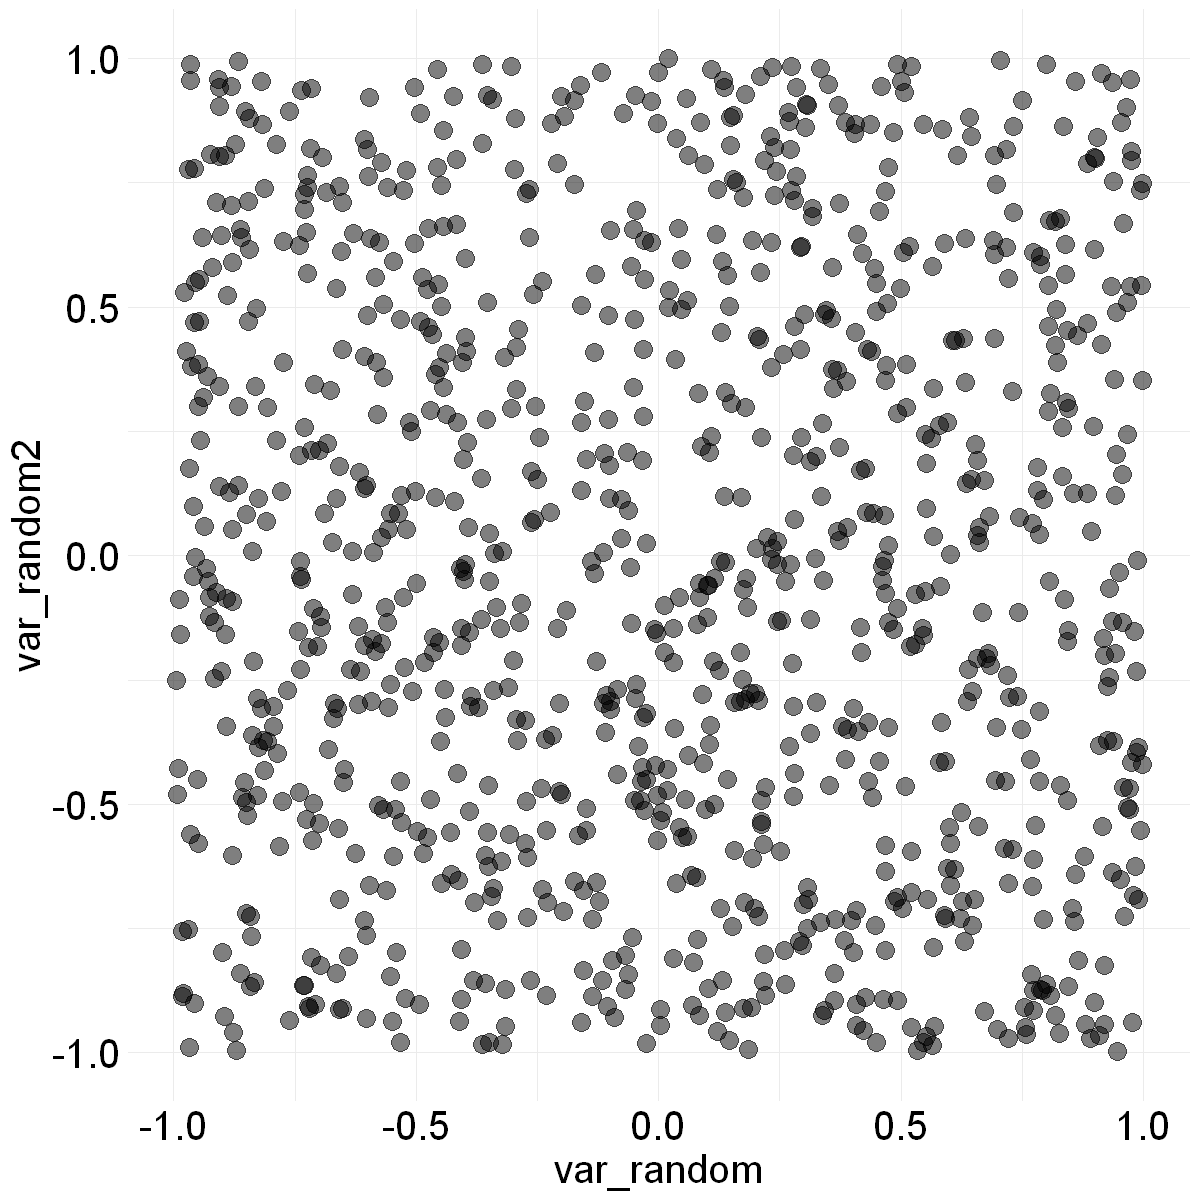

In [23]:
options(repr.plot.width=10, repr.plot.height=10)
df2<- data.frame(df,var_sin2,var_norm2,var_random2)
dt2 <- data.table(df2)
                 
p10 <-  ggplot(dt2) + geom_point(aes(x=var_sin,y=var_sin2),size=5,alpha=0.5)      + theme_pub()
p11 <-  ggplot(dt2) + geom_point(aes(x=var_norm,y=var_norm2),size=5,alpha=0.5)    + theme_pub()
p12 <-  ggplot(dt2) + geom_point(aes(x=var_random,y=var_random2),size=5,alpha=0.5)+ theme_pub()

p10 
p11 
p12

A few notes.  We did not use melt since we just needed to select the cols from our newly created dataframe. (If needed a melt `data.table` can be reshape using the command `dcast`)
We plotted them *in pairs* because we wanted to see if the "first measurement" was in some way correlated to the "second one"
In the first plot we've seen the pair of sinusoidal variables. We creaed them as correlated and in fact if we plot one vs the other we can see that the points lie on the bisect of the I and IV quadrant. They are positively lineary *correlated*.
Then we have the norm variables. both of them are created at taking random numbers from a normal distribution. 
Finally the random vars. totally random and no correlation between them as expected. The aspect of the plot was changed in order to give more space to the plot